Libraries and packages import

In [34]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

import nltk
from nltk.corpus import stopwords
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.classify import SklearnClassifier
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('sentiwordnet')


from wordcloud import WordCloud, STOPWORDS

!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import gensim

import re
import numpy as np
import os
import ssl
from collections import Counter
import logging
import time
import pickle
import itertools
from subprocess import check_output

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Let's upload the dataset, preprocess it and perform some EDA.

In [11]:
df = pd.read_csv('/content/drive/MyDrive/training.csv', encoding = 'ISO-8859-1', names = ['sentiment', 'id', 'date', 'query', 'user', 'text'])

Link to the original [dataset](https://www.kaggle.com/code/paoloripamonti/twitter-sentiment-analysis/data)

In [12]:
# Display the first 5 rows of the dataset.
df.head()

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [13]:
# Removing the columns that we don't need.
df.drop(['id', 'date', 'query', 'user'], axis = 1, inplace = True)
df

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [14]:
# Let's check how big the dataset is.
len(df)

1600000

For computational reasons, I will only use 1/4 of all the dataset entries. To keep an even distribution, I will take a random sample from it. 

In [15]:
data = df.sample(n=400000)
len(data)

400000

In [16]:
data.head()

,sentiment,text
206740,0,Does anyone know of a hairstlist in Des Moines...
3705,0,i didn't have enough sleep
665961,0,Aww watching a danielle steel film its sooo sa...
3751,0,"wishing i was getting $900 for free, but noooo..."
1197556,4,@modeloasis I agree


In [17]:
# Let's reset the index numbers
data = data.reset_index(drop=True)

In [18]:
data

,sentiment,text
0,0,Does anyone know of a hairstlist in Des Moines...
1,0,i didn't have enough sleep
2,0,Aww watching a danielle steel film its sooo sa...
3,0,"wishing i was getting $900 for free, but noooo..."
4,4,@modeloasis I agree
...,...,...
399995,0,Is so sad he still has 5 hours and 22 mins.
399996,0,Cant seem to shake the blues away
399997,0,@TraceCyrus one last shot. please? im actually...
399998,4,@BabyVanessa093 ok would you rather kiss Nick ...


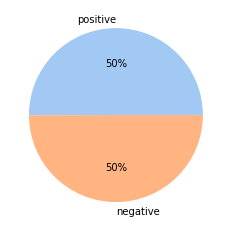

In [19]:
# Let's display the pie chart of the sentiment distribution.
data_pie = data.sentiment.value_counts()
labels = ['positive', 'negative']
colors = sns.color_palette('pastel')
plt.pie(data_pie, labels = labels, colors = colors, autopct = '%.0f%%')
plt.show()

In [20]:
# Let's display some details about the dataset.
data.describe()

,sentiment
count,400000.000000
mean,2.001500
std,2.000002
min,0.000000
25%,0.000000
50%,4.000000
75%,4.000000
max,4.000000


In [21]:
temp = data.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,text
1,4,200150
0,0,199850


In [22]:
# The positive sentiment is mapped on a 4, let's replace it with a 1.
data.sentiment = data.sentiment.replace(4, 1)

Before performing machine learning models, I will display a wordcloud based on the two different sentiments.

In [23]:
train, test = train_test_split(data, test_size = 0.2)

Positive words


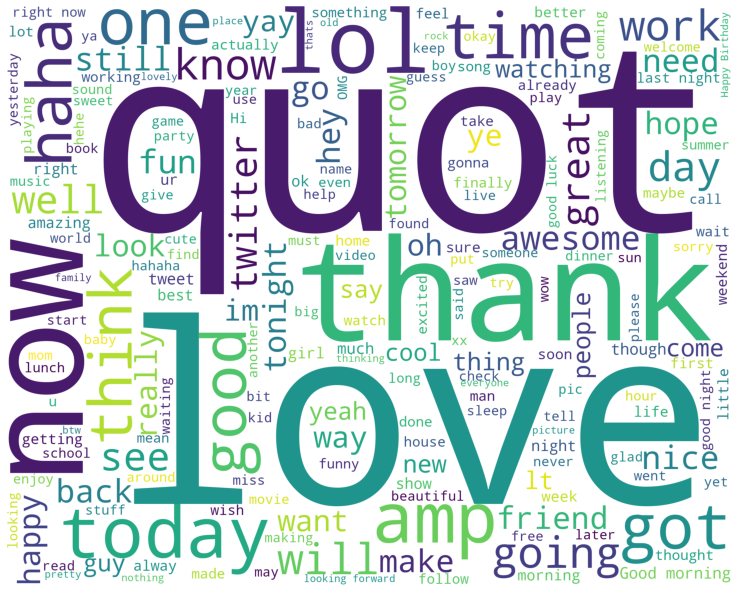

Negative words


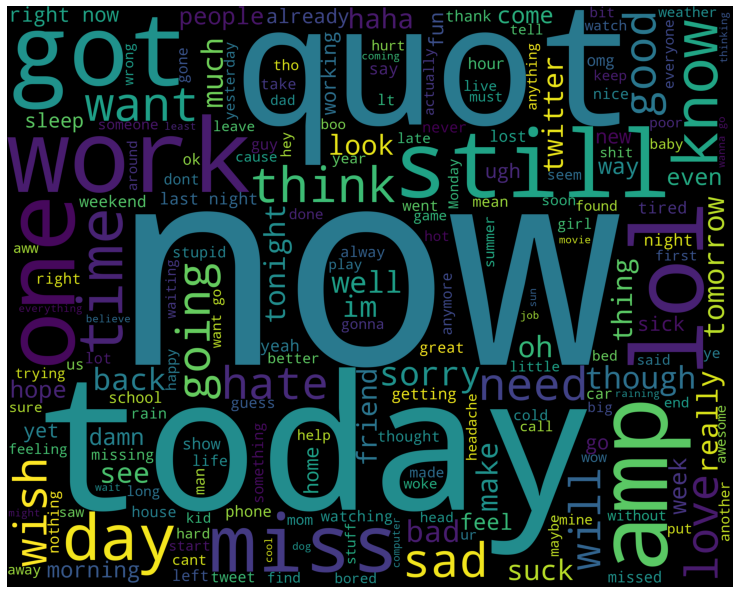

In [24]:
train_pos = train[train['sentiment'] == 1]
train_pos = train_pos['text']
train_neg = train[train['sentiment'] == 0]
train_neg = train_neg['text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [25]:
tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.sentiment))

test_pos = test[test['sentiment'] == 1]
test_pos = test_pos['text']
test_neg = test[test['sentiment'] == 0]
test_neg = test_neg['text']

In [26]:
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

In [27]:
features = extract_features(data['text'])

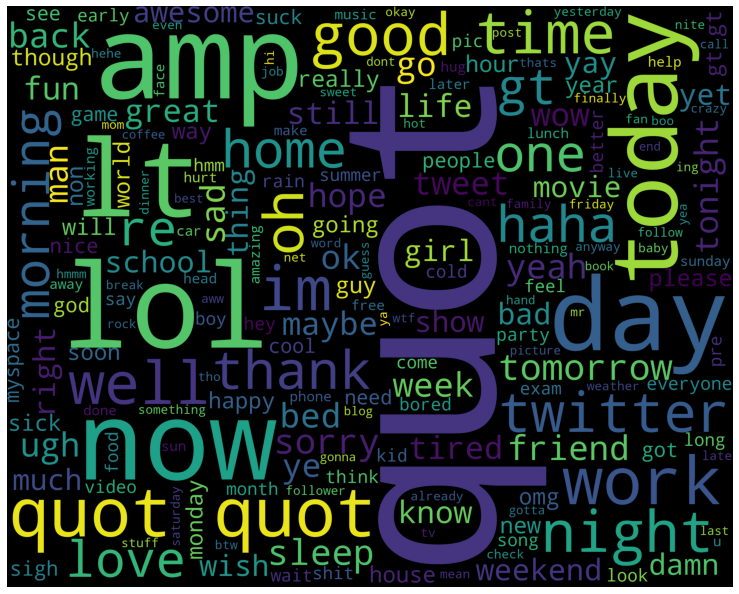

In [28]:
wordcloud_draw(w_features)

Lastly, I computed the Jaccard similarity between the set of words in the negative sentiment set and the positive one. 

In [30]:
tts = set(test_pos)
ttn = set(test_neg)
nltk.jaccard_distance(tts, ttn)

0.9998496240601503

Pre-processing of the strings and machine learning tests.

In [31]:
token = RegexpTokenizer(r'@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['text'])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(text_counts, data['sentiment'], test_size=0.2, random_state=42)

In [35]:
clf = MultinomialNB().fit(X_train, y_train)
y_pred= clf.predict(X_test)
print('\nMultinomal Naive Bayes')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')


Multinomal Naive Bayes
Accuracy Score: 59.466249999999995%
Confusion Matrix: 
[[30711  9216]
 [23211 16862]]


Let's repeat the test with the vectorized features to see if the results changes. 

In [36]:
tf=TfidfVectorizer()
text_tf= tf.fit_transform(data['text'])
X_train, X_test, y_train, y_test = train_test_split(text_tf, data['sentiment'], test_size=0.2, random_state=42)

In [37]:
clf = MultinomialNB().fit(X_train, y_train)
y_pred= clf.predict(X_test)
print('\nMultinomal Naive Bayes')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')


Multinomal Naive Bayes
Accuracy Score: 76.72%
Confusion Matrix: 
[[32948  6979]
 [11645 28428]]


Vectorized features perform much better, so for the remaining tests I will consider them as the default set. 

**Naive Bayes**

In [39]:
bnb = BernoulliNB().fit(X_train, y_train)
y_pred= bnb.predict(X_test)
print('\nBernoulli Naive Bayes')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')


Bernoulli Naive Bayes
Accuracy Score: 77.4825%
Confusion Matrix: 
[[32168  7759]
 [10255 29818]]


In [40]:
cnb = ComplementNB().fit(X_train, y_train)
y_pred = cnb.predict(X_test)
print('\nComplement Naive Bayes')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')


Complement Naive Bayes
Accuracy Score: 76.70375%
Confusion Matrix: 
[[32954  6973]
 [11664 28409]]


**Support Vector Machine**

In [41]:
SVM = LinearSVC()
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
print('\nSupport Vector Machine')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')


Support Vector Machine
Accuracy Score: 78.715%
Confusion Matrix: 
[[31005  8922]
 [ 8106 31967]]


**KNN**

In [42]:
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
print('\nK Nearest Neighbors (NN = 3)')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')


K Nearest Neighbors (NN = 3)
Accuracy Score: 68.43%
Confusion Matrix: 
[[28378 11549]
 [13707 26366]]


As I wrote in the paper, I will not cross-validate several Ks because it would take too long, but I will increase the K to 21 just to see if it performs better. An empirical rule I found is that one can try larger Ks as the dataset grows. 

In [43]:
KNN = KNeighborsClassifier(n_neighbors = 21)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
print('\nK Nearest Neighbors (NN = 21)')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')


K Nearest Neighbors (NN = 21)
Accuracy Score: 72.8275%
Confusion Matrix: 
[[30851  9076]
 [12662 27411]]


**Decision tree classifier**

In [44]:
dtc = DecisionTreeClassifier(max_depth = 20)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print('\nDecision Tree Classifier')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')


Decision Tree Classifier
Accuracy Score: 65.76625%
Confusion Matrix: 
[[20318 19609]
 [ 7778 32295]]


**Random Forest Classifier**

In [45]:
rfc = RandomForestClassifier(max_depth = 20)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('\nRandom Forest Classifier')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')


Random Forest Classifier
Accuracy Score: 74.23625%
Confusion Matrix: 
[[28417 11510]
 [ 9101 30972]]


**Logistic Regression**

Let's scale the data before applying logistic regression. 

In [47]:
std = StandardScaler(with_mean=False).fit(X_train)
X_train_std = std.transform(X_train)
std1 = StandardScaler(with_mean=False).fit(X_test)
X_test_std = std1.transform(X_test)

In [48]:
log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit(X_train_std, y_train)
y_pred = log_reg.predict(X_test_std)
print('\nLogistic Regression Classifier')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')


Logistic Regression Classifier
Accuracy Score: 72.965%
Confusion Matrix: 
[[29729 10198]
 [11430 28643]]


**Multilayer perceptron classifier**

In [49]:
mlp = MLPClassifier(max_iter=1000)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print('\nMLP Classifier')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')


MLP Classifier
Accuracy Score: 79.1775%
Confusion Matrix: 
[[31017  8910]
 [ 7748 32325]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


**VADER classifier**

In [50]:
analyzer = SentimentIntensityAnalyzer()
scores = []
# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
for i in range(data['text'].shape[0]):
#print(analyser.polarity_scores(sentiments_pd['text'][i]))
    compound = analyzer.polarity_scores(data['text'][i])["compound"]
    pos = analyzer.polarity_scores(data['text'][i])["pos"]
    neg = analyzer.polarity_scores(data['text'][i])["neg"]
    neu = analyzer.polarity_scores(data['text'][i])["neu"]
    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral" : neu
                  })

sentiment_score = pd.DataFrame.from_dict(scores)
data = data.join(sentiment_score)
data.head()

,sentiment,text,Compound,Positive,Negative,Neutral
0,0,Does anyone know of a hairstlist in Des Moines...,-0.3612,0.000,0.137,0.863
1,0,i didn't have enough sleep,0.0000,0.000,0.000,1.000
2,0,Aww watching a danielle steel film its sooo sa...,-0.8748,0.000,0.500,0.500
3,0,"wishing i was getting $900 for free, but noooo...",0.7825,0.396,0.000,0.604
4,1,@modeloasis I agree,0.3612,0.556,0.000,0.444


**WordNet classifier**

In order to implement the WordNet classifier, I'll make a copy of the original dataframe and manually clean it, then compute the scores. 

In [52]:
data_wn = data
data_wn.head()

,sentiment,text,Compound,Positive,Negative,Neutral
0,0,Does anyone know of a hairstlist in Des Moines...,-0.3612,0.000,0.137,0.863
1,0,i didn't have enough sleep,0.0000,0.000,0.000,1.000
2,0,Aww watching a danielle steel film its sooo sa...,-0.8748,0.000,0.500,0.500
3,0,"wishing i was getting $900 for free, but noooo...",0.7825,0.396,0.000,0.604
4,1,@modeloasis I agree,0.3612,0.556,0.000,0.444


In [53]:
data_wn = data_wn.drop(['Compound', 'Positive', 'Negative', 'Neutral'], axis = 1)
data_wn.head()

,sentiment,text
0,0,Does anyone know of a hairstlist in Des Moines...
1,0,i didn't have enough sleep
2,0,Aww watching a danielle steel film its sooo sa...
3,0,"wishing i was getting $900 for free, but noooo..."
4,1,@modeloasis I agree


In [54]:
def preprocess_tweets_data(data,name):
    # Proprocessing the data
    data[name]=data[name].str.lower()
    # Code to remove the Hashtags from the text
    data[name]=data[name].apply(lambda x:re.sub(r'\B#\S+','',x))
    # Code to remove the links from the text
    data[name]=data[name].apply(lambda x:re.sub(r"http\S+", "", x))
    # Code to remove the Special characters from the text 
    data[name]=data[name].apply(lambda x:' '.join(re.findall(r'\w+', x)))
    # Code to substitute the multiple spaces with single spaces
    data[name]=data[name].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
    # Code to remove all the single characters in the text
    data[name]=data[name].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
    # Remove the twitter handlers
    data[name]=data[name].apply(lambda x:re.sub('@[^\s]+','',x))

In [55]:
def rem_stopwords_tokenize(data,name):
      
    def getting(sen):
        example_sent = sen
        
        filtered_sentence = [] 

        stop_words = set(stopwords.words('english')) 

        word_tokens = word_tokenize(example_sent) 
        
        filtered_sentence = [w for w in word_tokens if not w in stop_words] 
        
        return filtered_sentence
    # Using "getting(sen)" function to append edited sentence to data
    x=[]
    for i in data[name].values:
        x.append(getting(i))
    data[name]=x

In [56]:
lemmatizer = WordNetLemmatizer()
def Lemmatization(data,name):
    def getting2(sen):
        
        example = sen
        output_sentence =[]
        word_tokens2 = word_tokenize(example)
        lemmatized_output = [lemmatizer.lemmatize(w) for w in word_tokens2]
        
        # Remove characters which have length less than 2  
        without_single_chr = [word for word in lemmatized_output if len(word) > 2]
        # Remove numbers
        cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]
        
        return cleaned_data_title
    # Using "getting2(sen)" function to append edited sentence to data
    x=[]
    for i in data[name].values:
        x.append(getting2(i))
    data[name]=x

In [57]:
def make_sentences(data,name):
    data[name]=data[name].apply(lambda x:' '.join([i+' ' for i in x]))
    # Removing double spaces if created
    data[name]=data[name].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [60]:
# Using the preprocessing function to preprocess
preprocess_tweets_data(data_wn,'text')
# Using tokenizer and removing the stopwords
rem_stopwords_tokenize(data_wn,'text')
# Converting all the texts back to sentences
make_sentences(data_wn,'text')

#Edits After Lemmatization
final_Edit = data_wn['text'].copy()
data_wn["After_lemmatization"] = final_Edit

# Using the Lemmatization function to lemmatize
Lemmatization(data_wn,'After_lemmatization')
# Converting all the texts back to sentences
make_sentences(data_wn,'After_lemmatization')

In [61]:
Edited_tweet = data_wn['text'].copy()
data_wn['tweets_without_stopwords'] = Edited_tweet

In [62]:
data_wn.head()

,sentiment,text,After_lemmatization,tweets_without_stopwords
0,0,anyone know ofhairstlist des moines isnafraid ...,anyone know ofhairstlist moines isnafraid take...,anyone know ofhairstlist des moines isnafraid ...
1,0,didnhave enough sleep,didnhave enough sleep,didnhave enough sleep
2,0,aww watchingdanielle steel film sooo sad cryin...,aww watchingdanielle steel film sooo sad cry b...,aww watchingdanielle steel film sooo sad cryin...
3,0,wishingwas getting 900 free noooo mr rudd want...,wishingwas getting free noooo rudd want play m...,wishingwas getting 900 free noooo mr rudd want...
4,1,modeloasisagree,modeloasisagree,modeloasisagree


In [63]:
pos=neg=obj=count=0

postagging = []

for tweet in data_wn['After_lemmatization']:
    list = word_tokenize(tweet)
    postagging.append(nltk.pos_tag(list))

data_wn['pos_tags'] = postagging

def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None


# Returns list of pos-neg and objective score. But returns empty list if not present in senti wordnet.
def get_sentiment(word,tag):
    wn_tag = penn_to_wn(tag)
    
    if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
        return []

    #Lemmatization
    lemma = lemmatizer.lemmatize(word, pos=wn_tag)
    if not lemma:
        return []

    #Synset is a special kind of a simple interface that is present in NLTK to look up words in WordNet. 
    #Synset instances are the groupings of synonymous words that express the same concept. 
    #Some of the words have only one Synset and some have several.
    synsets = wn.synsets(word, pos=wn_tag)
    if not synsets:
        return []

    # Take the first sense, the most common
    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name())

    return [synset.name(), swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()]

    pos=neg=obj=count=0
    
  
senti_score = []

for pos_val in data_wn['pos_tags']:
    senti_val = [get_sentiment(x,y) for (x,y) in pos_val]
    for score in senti_val:
        try:
            pos = pos + score[1]  #positive score is stored at 2nd position
            neg = neg + score[2]  #negative score is stored at 3rd position
        except:
            continue
    senti_score.append(pos - neg)
    pos=neg=0    
    
data_wn['senti_score'] = senti_score
print(data_wn['senti_score'])

print(data_wn.head)

0        -0.250
1         0.125
2        -1.250
3         0.375
4         0.000
          ...  
399995   -0.125
399996    0.000
399997    0.250
399998    0.000
399999    0.000
Name: senti_score, Length: 400000, dtype: float64
<bound method NDFrame.head of         sentiment                                               text  \
0               0  anyone know ofhairstlist des moines isnafraid ...   
1               0                             didnhave enough sleep    
2               0  aww watchingdanielle steel film sooo sad cryin...   
3               0  wishingwas getting 900 free noooo mr rudd want...   
4               1                                   modeloasisagree    
...           ...                                                ...   
399995          0                         sad still 5 hours 22 mins    
399996          0                        cant seem shake blues away    
399997          0  tracecyrus one last shot please im actually be...   
399998          1  babyv

In [64]:
data_wn.senti_score.describe()

count    400000.00000
mean          0.10336
std           0.46530
min          -5.00000
25%           0.00000
50%           0.00000
75%           0.25000
max           7.50000
Name: senti_score, dtype: float64

I'll take the mean as the threshold to assign the sentiments based on the scores. 

In [65]:
overall=[]
for i in range(len(data)):
    if data_wn['senti_score'][i]>= 0.10336:
        overall.append('1')
    else:
        overall.append('0')
data_wn['Overall Sentiment']=overall

In [66]:
data_wn.head()

,sentiment,text,After_lemmatization,tweets_without_stopwords,pos_tags,senti_score,Overall Sentiment
0,0,anyone know ofhairstlist des moines isnafraid ...,anyone know ofhairstlist moines isnafraid take...,anyone know ofhairstlist des moines isnafraid ...,"[(anyone, NN), (know, VBP), (ofhairstlist, JJ)...",-0.250,0
1,0,didnhave enough sleep,didnhave enough sleep,didnhave enough sleep,"[(didnhave, VB), (enough, JJ), (sleep, NN)]",0.125,1
2,0,aww watchingdanielle steel film sooo sad cryin...,aww watchingdanielle steel film sooo sad cry b...,aww watchingdanielle steel film sooo sad cryin...,"[(aww, NN), (watchingdanielle, WRB), (steel, N...",-1.250,0
3,0,wishingwas getting 900 free noooo mr rudd want...,wishingwas getting free noooo rudd want play m...,wishingwas getting 900 free noooo mr rudd want...,"[(wishingwas, IN), (getting, VBG), (free, JJ),...",0.375,1
4,1,modeloasisagree,modeloasisagree,modeloasisagree,"[(modeloasisagree, NN)]",0.000,0


Let's display the sentiment distribution of the original data set, and the ones of the WordNet classification. 

In [69]:
print('Original dataset sentiment:')
data.sentiment.value_counts()

Original dataset sentiment:


1    200150
0    199850
Name: sentiment, dtype: int64

In [70]:
print('Overall WordNet sentiment')
data_wn['Overall Sentiment'].value_counts()

Overall WordNet sentiment


0    254280
1    145720
Name: Overall Sentiment, dtype: int64

**LSTM**

In [71]:
data.head()

,sentiment,text,Compound,Positive,Negative,Neutral
0,0,Does anyone know of a hairstlist in Des Moines...,-0.3612,0.000,0.137,0.863
1,0,i didn't have enough sleep,0.0000,0.000,0.000,1.000
2,0,Aww watching a danielle steel film its sooo sa...,-0.8748,0.000,0.500,0.500
3,0,"wishing i was getting $900 for free, but noooo...",0.7825,0.396,0.000,0.604
4,1,@modeloasis I agree,0.3612,0.556,0.000,0.444


In [72]:
data_lstm = data.drop(['Compound', 'Positive', 'Negative', 'Neutral'], axis = 1)

In [73]:
data_lstm.head()

,sentiment,text
0,0,Does anyone know of a hairstlist in Des Moines...
1,0,i didn't have enough sleep
2,0,Aww watching a danielle steel film its sooo sa...
3,0,"wishing i was getting $900 for free, but noooo..."
4,1,@modeloasis I agree


Pre-processing phase for the LSTM implementation.

In [74]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

In [76]:
text_cleaning_re = '@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+'

In [75]:
def preprocess(text, stem = False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return ' '.join(tokens)

In [77]:
data_lstm.text = data_lstm.text.apply(lambda x : preprocess(x))

Train and test set split.

In [78]:
df_train, df_test = train_test_split(data_lstm, test_size = 0.2, random_state = 42)
print('Train size: ', len(df_train))
print('Test size: ', len(df_test))

Train size:  320000
Test size:  80000


Word2Vec: vectorizing the features.

In [79]:
documents = [_text.split() for _text in df_train.text]

In [80]:
w2v_model = gensim.models.word2vec.Word2Vec(size = 300, window = 7, min_count = 10, workers = 8)

In [81]:
w2v_model.build_vocab(documents)

In [82]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print('Vocab size: ', vocab_size)

Vocab size:  13361


In [83]:
w2v_model.train(documents, total_examples = len(documents), epochs = 32)

(63110496, 73774336)

Tokenization.

In [85]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.text)
vocab_size = len(tokenizer.word_index) + 1
print('Total words: ', vocab_size)

Total words:  119411


In [87]:
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.text), maxlen = 300)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.text), maxlen = 300)

Label encoding.

In [90]:
labels = df_train.sentiment.unique().tolist()
labels

[0, 1]

In [92]:
encoder = LabelEncoder()
encoder.fit(df_train.sentiment.tolist())

y_train = encoder.transform(df_train.sentiment.tolist())
y_test = encoder.transform(df_test.sentiment.tolist())

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

y_train:  (320000, 1)
y_test:  (80000, 1)


Embedding layer.

In [94]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(119411, 300)


In [95]:
embedding_layer = Embedding(vocab_size, 300, weights = [embedding_matrix], input_length = 300, trainable = False)

In [96]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 300)          35823300  
                                                                 
 dropout (Dropout)           (None, 300, 300)          0         
                                                                 
 lstm (LSTM)                 (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 35,983,801
Trainable params: 160,501
Non-trainable params: 35,823,300
_________________________________________________________________


In [97]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [102]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]

In [103]:
history = model.fit(x_train, y_train,
                    batch_size=1024,
                    epochs=8,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/8
282/282 [==============================] - 353s 1s/step - loss: 0.4801 - accuracy: 0.7670 - val_loss: 0.4700 - val_accuracy: 0.7760 - lr: 0.0010
Epoch 2/8
282/282 [==============================] - 352s 1s/step - loss: 0.4779 - accuracy: 0.7683 - val_loss: 0.4689 - val_accuracy: 0.7769 - lr: 0.0010
Epoch 3/8
282/282 [==============================] - 351s 1s/step - loss: 0.4760 - accuracy: 0.7692 - val_loss: 0.4666 - val_accuracy: 0.7764 - lr: 0.0010
Epoch 4/8
282/282 [==============================] - 351s 1s/step - loss: 0.4742 - accuracy: 0.7706 - val_loss: 0.4657 - val_accuracy: 0.7782 - lr: 0.0010
Epoch 5/8
282/282 [==============================] - 348s 1s/step - loss: 0.4729 - accuracy: 0.7716 - val_loss: 0.4658 - val_accuracy: 0.7777 - lr: 0.0010
Epoch 6/8
282/282 [==============================] - 350s 1s/step - loss: 0.4727 - accuracy: 0.7712 - val_loss: 0.4666 - val_accuracy: 0.7784 - lr: 0.0010
Epoch 7/8
282/282 [==============================] - 348s 1s/step - lo

In [105]:
score = model.evaluate(x_test, y_test, batch_size = 1024)
print()
print('Accuracy: ', score[1])
print('Loss: ', score[0])

79/79 [==============================] - 10s 120ms/step - loss: 0.4588 - accuracy: 0.7839

Accuracy:  0.783887505531311
Loss:  0.4588269889354706


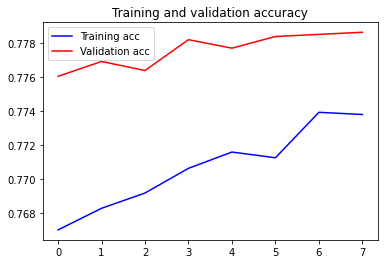

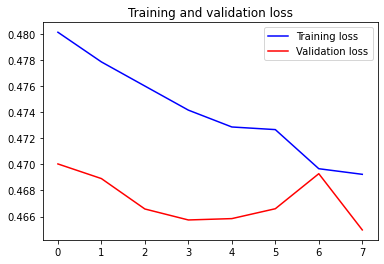

In [106]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [108]:
def decode_sentiment(score, include_neutral=False):
    if include_neutral:        
        label = -1
        if score <= 0.4:
            label = 0
        elif score >= 0.7:
            label = 1

        return label
    else:
        return 0 if score < 0.5 else 1

In [111]:
def predict(text, include_neutral=False):
    start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=300)
    # Predict
    score = model.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score, include_neutral=include_neutral)

    return {"label": label, "score": float(score),
       "elapsed_time": time.time()-start_at} 

In [114]:
y_pred_1d = []
y_test_1d = df_test.sentiment
scores = model.predict(x_test, verbose=1, batch_size=8000)
y_pred_1d = [decode_sentiment(score, include_neutral=False) for score in scores]

10/10 [==============================] - 6s 545ms/step


In [115]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

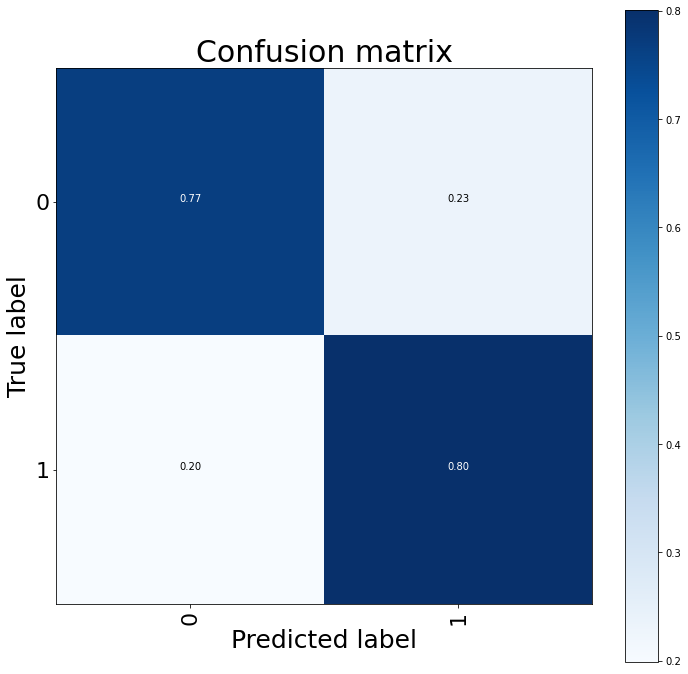

In [117]:
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=df_train.sentiment.unique(), title="Confusion matrix")
plt.show()

In [118]:
print(classification_report(y_test_1d, y_pred_1d))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78     39927
           1       0.78      0.80      0.79     40073

    accuracy                           0.78     80000
   macro avg       0.78      0.78      0.78     80000
weighted avg       0.78      0.78      0.78     80000



In [119]:
accuracy_score(y_test_1d, y_pred_1d)

0.7838875

In [120]:
model.save('model.h5')
w2v_model.save('model.w2v')
pickle.dump(tokenizer, open('tokenizer.pkl', "wb"), protocol=0)
pickle.dump(encoder, open('encoder.pkl', "wb"), protocol=0)